<a href="https://colab.research.google.com/github/tuntul17/FIZ437E/blob/main/FIZ437HW2_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary classification using **log regression** 

**10% test data** 

show that you stop before overfitting by drawing the training curve (Loss vs # of epoch)

DO NOT USE scikit learn or pytorch!

In [ ]:
import numpy as np
import pandas as pd
import math as mt
from pylab import *
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#preparing dataset
df = pd.read_csv('https://query.data.world/s/bu2merlkc4s6t3k37rch42hs7f7ll2')
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

**GP** - Games played

**MIN** - minutes played

**PTS** - points per game

**FGM** - field goals made

**FGA** - field goal attempts

**FG%** - field goal percentage

**3P MADE** - 3point made

**3PA** - 3points attempt

**FTM** - free throw made

**FTA** - free throw attempts

**FT%** - free throw percentage

**OREB** - offensive rebounds

In [ ]:
df.drop("Name",axis=1,inplace=True)
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
#In order to fix the missing values in 3 points percantages update the missing values with mean of the 3P%
upd_df = df
upd_df["3P%"]=upd_df["3P%"].fillna(upd_df["3P%"].mean())
upd_df.isnull().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [ ]:
upd_df.describe() 

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


831 number of rookies plays more than 5 years.
509 number of rookies plays less than 5 years.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


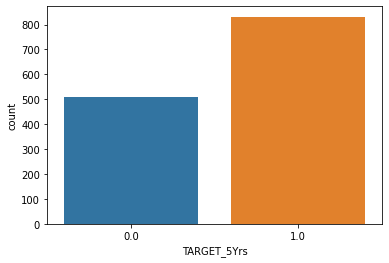

In [ ]:
dat = upd_df 
count = dat["TARGET_5Yrs"]
distro = count.value_counts()
#show the distrubution 
print(distro[1],"number of rookies plays more than 5 years.")
print(distro[0],"number of rookies plays less than 5 years.")
sns.countplot(count)

**1.0** ==> player plays more than 5 years

**0.0** ==> player plays less than 5 years


In [ ]:
#just to look at the average of a 5+ years player stats
m_by_year = dat.groupby("TARGET_5Yrs").mean()
m_by_year

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,51.577603,14.252259,5.042829,1.946169,4.542043,42.388802,0.229666,0.754617,19.377306,0.923379,1.321611,68.858546,0.718271,1.531238,2.247544,1.221022,0.498232,0.253438,0.942240
1.0,65.826715,19.690253,7.878700,3.047413,6.708063,45.260048,0.258604,0.794224,19.265753,1.526955,2.128400,71.183394,1.187726,2.328640,3.516486,1.752347,0.692178,0.439110,1.347533


Some examples of the distribution of games played and points, steal etc.

Text(0, 0.5, 'Points')

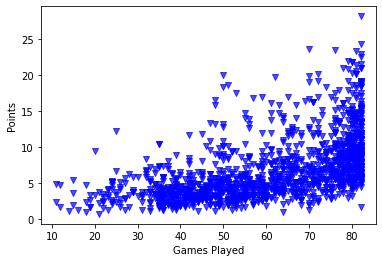

In [ ]:
scatter(x="GP",y="PTS", data = dat,alpha = 0.7,c = 'b',marker = "v")
xlabel("Games Played")
ylabel("Points")

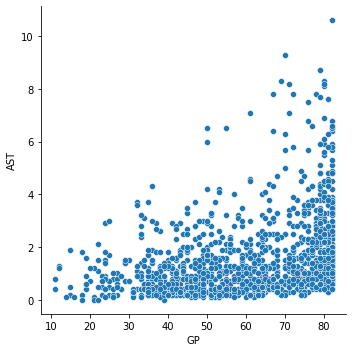

In [ ]:
sns.relplot(x="GP",y="AST", data = dat) #in seaborn i don't need to label the axis nice to see!

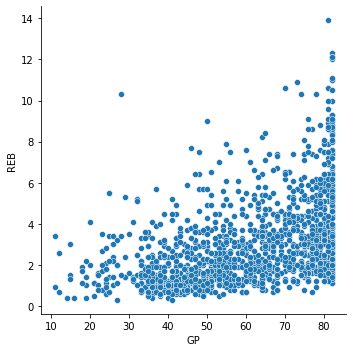

In [ ]:
sns.relplot(x="GP",y ="REB",data = dat )

In [ ]:
#Now Let's obtain the X and Y's
x = dat.iloc[:,0:19]
y = dat.iloc[:,-1] # TARGET_5Yrs (0,1)

In [ ]:
y

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1335    0.0
1336    1.0
1337    0.0
1338    1.0
1339    1.0
Name: TARGET_5Yrs, Length: 1340, dtype: float64

In [ ]:
#SCALE THE DATA 
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features
x

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791
1336,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070
1337,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047
1338,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791


Split **Test** and **Training** data

In [ ]:
xtr,xts,ytr,yts = train_test_split(x,y,train_size=0.9)


**Fun Time Begins**

In [ ]:
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
#Log Regression Algorithm
def algo(x,y,lr,N):
  #x,y,learning rate, itarations(epoch,N)
  m = xtr.shape[1] # num of feature
  n = xtr.shape[0] #training example
  W = np.zeros((n,1))
  B = 0
  loss_list = []
  ynp = y.to_numpy().reshape(1206,1)
  for i in range(N):  
    Z = np.dot(W.T, x) + B
    A = sigmoid(Z)       
    #Loss(L) fn
    L = -(1/m)*np.sum( ynp*np.log(A) + (1-ynp)*np.log(1-A))        
    #Gradient Descent
    dW = (1/m)*np.dot(A-ynp, x.T)
    dB = (1/m)*np.sum(A - ynp)        
    W = W - lr*dW
    B = B - lr*dB
    #upgrading cost fn as we go
    loss_list.append(L)       
    if(i%(N/10) == 0):
      print("loss after ",i,"epcoh is: ",L) 
  return W, B, loss_list

In [ ]:
N = 10**4
lr = 10**-6
win,b,loss = algo(xtr,ytr,lr,N)



loss after  0 epcoh is:  835.935499755294
loss after  1000 epcoh is:  815.7168356661822
loss after  2000 epcoh is:  804.9161311463429
loss after  3000 epcoh is:  799.0308480897423
loss after  4000 epcoh is:  795.7276585942898
loss after  5000 epcoh is:  793.7933651176044
loss after  6000 epcoh is:  792.592212459614
loss after  7000 epcoh is:  791.7881841322707
loss after  8000 epcoh is:  791.2022981045187
loss after  9000 epcoh is:  790.7385879144672


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


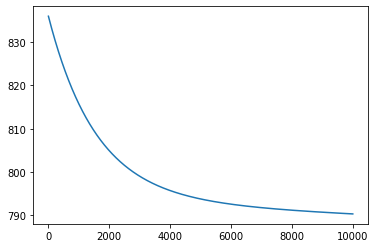

In [ ]:
sns.lineplot(np.arange(N), loss)


In [ ]:
len(loss)

10000

In [ ]:
#accuracy
def accuracy(X, Y, wei, B):
    print("weigths: ", wei.shape)
    print("X: ",X.shape)
    Z = np.dot(wei.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [ ]:
type(win)

numpy.ndarray

In [ ]:
accuracy(xts, yts, win, b)

weigths:  (1206, 1206)
X:  (134, 19)


ValueError: ignored

In [ ]:
#Test and error